In [1]:
import os
import numpy as np

from read_data import ReadClass

experiment_name = "exRo10N3e06_LES"
figure_directory = "../figure/" + experiment_name
if not os.path.isdir(figure_directory):
    os.makedirs(figure_directory)
    
reader = ReadClass(experiment_name)
reader.read_geometry()

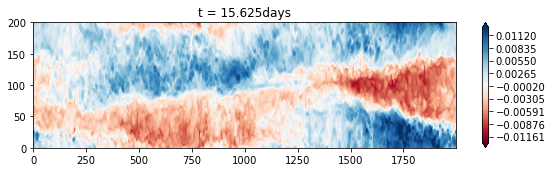

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

color = [(0.278431, 0.278431, 0.858824),
         (0.0, 0.0, 0.360784),
         (0.0, 1.0, 1.0),
         (0.0, 0.501961, 0.0),
         (1.0, 1.0, 0.0),
         (1.0, 0.380392, 0.0),
         (0.419608, 0.0, 0.0),
         (0.878431, 0.301961, 0.301961)]
cmap_name = 'Rainbow_Desaturated'
cm_cbgyrk = colors.LinearSegmentedColormap.from_list(cmap_name, color, N=300)

thin = 1

fig = plt.figure(figsize=[8, 2.5])
fig.subplots_adjust(left=0.15, bottom=0.06, right=0.96,
                    top=0.94, wspace=0.2, hspace=0.2)

it = int(200 * 5)
ip = 0

# it = 400
T = reader.get_snapshot('T', ip, it, surface='XZ')
U = reader.get_snapshot('U', ip, it, surface='XZ')
V = reader.get_snapshot('V', ip, it, surface='XZ')
delta_Z = reader.l3 / reader.n3
T_total = np.zeros_like(T)
for i in range(reader.n3):
    T_total[:,i] = (i * delta_Z * reader.buoyancy_frequency
                    + T[:,i])

X_ax = np.linspace(0, reader.l1, reader.n1)[::thin]
Z_ax = np.linspace(0, reader.l3, reader.n3)[::thin]
var = 'U'
if (var == 'T'):
    data = T_total[::thin, ::thin].transpose()
    cmap = cm_cbgyrk
    data_max = data.max()
    data_min = data.min()
    levels = np.linspace(data_min, data_max, 64, endpoint=True)
elif (var == 'U'):
    data = U[::thin, ::thin].transpose()
    cmap = cm.RdBu
    data_max = np.abs(data).max() * 0.8
    levels = np.linspace(-data_max, data_max, 64, endpoint=True)
elif (var == 'V'):
    data = V[::thin, ::thin].transpose()
    cmap = cm.RdBu
    data_max = np.abs(data).max() * 0.8
    levels = np.linspace(-data_max, data_max, 64, endpoint=True)


ax1 = fig.add_subplot(111)
cf = ax1.contourf(X_ax, Z_ax, data,
                  cmap=cmap, levels=levels, extend='both')
# ax1.contourf(data[:,:], cmap=cm.seismic, levels=levels, extend='both')
ax1.set_title('t = ' + str(it / 64) + 'days')
fig.colorbar(cf, ax=ax1);
fig.tight_layout()

figure_name = "snapshot_" + var + '_' + str(it)
fig.savefig(figure_directory + "/" + figure_name + '.eps')
fig.savefig(figure_directory + "/" + figure_name + '.png')

In [ ]:
N = reader.buoyancy_frequency
dUdZ = np.diff(U, axis=0) / delta_Z
dVdZ = np.diff(V, axis=0) / delta_Z
dTdZ = np.diff(T, axis=0) / delta_Z + N
Ri = N * dTdZ / (dUdZ**2 + dVdZ**2)

ax2 = fig.add_subplot(122)
clevels = np.linspace(0, 0.4, 9)
cf2 = ax2.contourf(Ri[::thin, ::thin], cmap=cm.gist_stern, levels=clevels,
                   extend='both')
# ax2.contourf(data[:,:], cmap=cm.seismic, levels=64)
ax2.set_title('t = ' + str(it / 64));
# plt.contourf(data[:, ::thin], cmap=cm.seismic, levels=64);
# data = reader.get_snapshot('T', it, surface='XY')
# plt.contourf(data[::thin, ::thin], cmap=cm.seismic, levels=64)
fig.colorbar(cf2, ax=ax2);

In [ ]:
## Vorticity

# it = int(64 * 5)
U = reader.get_snapshot('U', it, surface='ZX')
W = reader.get_snapshot('W', it, surface='ZX')

delta_X = reader.length1 / reader.n1
delta_Z = reader.length3 / reader.n3
dUdZ = np.diff(U, axis=0) / delta_Z
dWdX = np.diff(W, axis=1) / delta_X
Vorticity = dUdZ[:,1:] - dWdX[1:,:]

data_max = np.abs(Vorticity).max() * 0.75
levels = np.linspace(-data_max, data_max, 64, endpoint='True')
plt.contourf(Vorticity[::thin, ::thin], cmap=cm.seismic,
             levels=levels, extend='both')
plt.colorbar();